# Atividade - Classificação
---
### Autor: Alexandre Marcondes

---
### Utilização do algoritmo SGD de classificação na base "SAheart.csv"

Classificar um conjunto de pessoas presentes no dataset entre portadores de doenças cardíacas ou não, de acordo com as demais colunas características.

---

In [1]:
# data
import pandas as pd
import numpy as np

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_confusion_matrix

In [2]:
# dataset
df = pd.read_csv('SAheart.csv')
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
df.shape

(462, 10)

### Definição das colunas

* Coluna alvo: "chd"

* Colunas características: demais colunas

Para a coluna alvo:
* 0. indivíduo sem doença cardíaca (negativo)
* 1. indivíduo com doença cardíaca (positivo)

In [4]:
df.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [5]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [6]:
df.corr()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
sbp,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954,0.254121
typea,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125,0.062531
age,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,0.192354,0.299718,0.263053,0.254121,0.103156,0.100095,0.062531,0.372973,1.000000


### Transformando a coluna categórica "famhist"

In [7]:
le = LabelEncoder()
df.loc[:,'famhist'] = le.fit_transform(df.famhist)
print(le.classes_)
print(le.transform(le.classes_))

['Absent' 'Present']
[0 1]


In [8]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


### Modelagem e predição

In [9]:
# coluna alvo
y = df.chd
# colunas características
X = df.drop(['chd'], axis=1)
X = X.loc[:,['ldl','age']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(369, 2) (369,)
(93, 2) (93,)
0    234
1    135
Name: chd, dtype: int64
0    68
1    25
Name: chd, dtype: int64


In [11]:
### Gradiente descendente
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
y_sgd = sgd_clf.predict(X_test)


# Regressão logística
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
y_log = log_clf.predict(X_test)

# Navie-Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_nb = nb_clf.predict(X_test)



In [12]:
print('Classificador com SGD:\n')
print(classification_report(y_test,y_sgd))
print('\n\nClassificador com regressão logística:\n')
print(classification_report(y_test,y_log))
print('\n\nClassificador com Naive-Bayes:\n')
print(classification_report(y_test,y_nb))

Classificador com SGD:

              precision    recall  f1-score   support

           0       0.87      0.60      0.71        68
           1       0.41      0.76      0.54        25

    accuracy                           0.65        93
   macro avg       0.64      0.68      0.62        93
weighted avg       0.75      0.65      0.67        93



Classificador com regressão logística:

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        68
           1       0.48      0.40      0.43        25

    accuracy                           0.72        93
   macro avg       0.63      0.62      0.62        93
weighted avg       0.71      0.72      0.71        93



Classificador com Naive-Bayes:

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        68
           1       0.52      0.48      0.50        25

    accuracy                           0.74        93
   macro avg       0.67     

In [13]:
print('[TN,FP]')
print('[FN,TP]')
print('SGD:')
print(confusion_matrix(y_test, y_sgd))
print('Logística:')
print(confusion_matrix(y_test, y_log))
print('NB:')
print(confusion_matrix(y_test, y_nb))

[TN,FP]
[FN,TP]
SGD:
[[41 27]
 [ 6 19]]
Logística:
[[57 11]
 [15 10]]
NB:
[[57 11]
 [13 12]]


Matriz de confusão - SGD

---

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x287a2727948>)

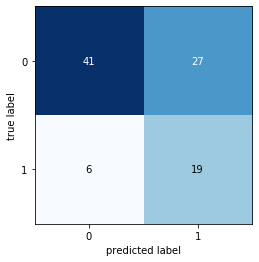

In [14]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_sgd))

Matriz de confusão - Regressão logística

---

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x287a2a90708>)

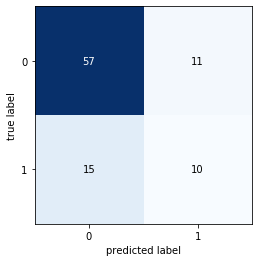

In [15]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_log))

Matriz de confusão - Naive Bayes

---

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x287a2a9ce08>)

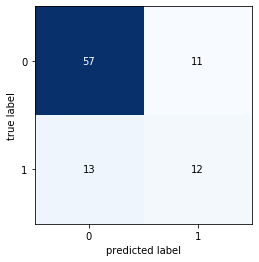

In [16]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_nb))

# Gráficos

In [17]:
X = X_test.to_numpy()
y = y_test.to_numpy()

Text(0, 0.5, 'age')

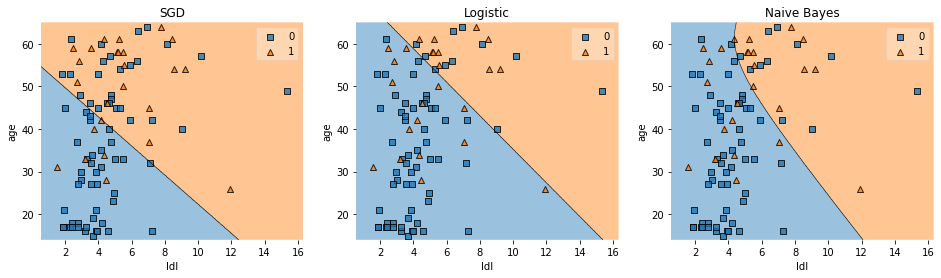

In [18]:
fig, axs = plt.subplots(1,3,figsize=(16,4))
fig = plot_decision_regions(X, y, clf=sgd_clf, ax=axs[0])
axs[0].set_title('SGD')
axs[0].set_xlabel('ldl')
axs[0].set_ylabel('age')
fig = plot_decision_regions(X, y, clf=log_clf, ax=axs[1])
axs[1].set_title('Logistic')
axs[1].set_xlabel('ldl')
axs[1].set_ylabel('age')
fig = plot_decision_regions(X, y, clf=nb_clf, ax=axs[2])
axs[2].set_title('Naive Bayes')
axs[2].set_xlabel('ldl')
axs[2].set_ylabel('age')